# Convolutional Neural Networks

## Project: Write an Algorithm for Landmark Classification

### A simple app

In this notebook I built a very simple app that uses my exported model.

> <img src="static_images/icons/noun-info-2558213.png" alt="?" style="width:25px"/>  Now I can ship that file to anybody, and as long as they can import ``torch``, they will be able to use my model. This is very important for releasing pytorch models to production.

### Test your app
 Save an example of Los Pinochos de Beniel locally, then uploaded them to my app to see how your model behaves.

The app will shows the top 5 classes that the model think are most relevant for the picture I have uploaded

In [1]:
!pip install ipywidgets

In [4]:
from ipywidgets import VBox, Button, FileUpload, Output, Label
from PIL import Image
from IPython.display import display
import io
import numpy as np
import torchvision
import torchvision.transforms as T
import torch

# Decide which model you want to use among the ones exported
learn_inf = torch.jit.load("checkpoints/transfer_exported.pt")

def on_click_classify(change):

    # Load image that has been uploaded
    fn = io.BytesIO(btn_upload.data[-1])

    img = Image.open(fn)
    img.load()

    # Let's clear the previous output (if any)
    out_pl.clear_output()

    # Display the image
    with out_pl:

        ratio = img.size[0] / img.size[1]
        c = img.copy()
        c.thumbnail([ratio * 200, 200])
        display(c)

    # Transform to tensor
    timg = T.ToTensor()(img).unsqueeze_(0)

    # Calling the model
    softmax = learn_inf(timg).data.cpu().numpy().squeeze()
    
    # Get the indexes of the classes ordered by softmax
    # (larger first)
    idxs = np.argsort(softmax)[::-1]
    
    # Loop over the classes with the largest softmax
    for i in range(5):
        # Get softmax value
        p = softmax[idxs[i]]
    
        # Get class name
        landmark_name = learn_inf.class_names[idxs[i]]
        
        labels[i].value = f"{landmark_name} (prob: {p:.2f})"


# Putting back btn_upload to a widget for next cell
btn_upload = FileUpload()

btn_run = Button(description="Classify")
btn_run.on_click(on_click_classify)

labels = []
for _ in range(5):
    labels.append(Label())

out_pl = Output()
out_pl.clear_output()

wgs = [Label("Please upload a picture of a landmark"), btn_upload, btn_run, out_pl]
wgs.extend(labels)

VBox(wgs)

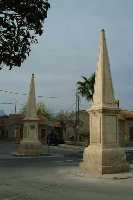

31.Washington_Monument (prob: 0.26)
19.Vienna_City_Hall (prob: 0.23)
14.Terminal_Tower (prob: 0.13)
16.Eiffel_Tower (prob: 0.10)
45.Temple_of_Heaven (prob: 0.06)


code/__torch__/torchvision/transforms/functional.py:188: UserWarning: The default value of the antialias parameter of all the resizing transforms (Resize(), RandomResizedCrop(), etc.) will change from None to True in v0.17, in order to be consistent across the PIL and Tensor backends. To suppress this warning, directly pass antialias=True (recommended, future default), antialias=None (current default, which means False for Tensors and True for PIL), or antialias=False (only works on Tensors - PIL will still use antialiasing). This also applies if you are using the inference transforms from the models weights: update the call to weights.transforms(antialias=True).


In [9]:
from ipywidgets import VBox, Button, FileUpload, Output, Label
from PIL import Image
from IPython.display import display
import io
import numpy as np
import torchvision
import torchvision.transforms as T
import torch

learn_inf = torch.jit.load("checkpoints/transfer_exported.pt")

# Load image that has been uploaded
img = Image.open("Beniel_mojonesdelreino.jpg") #eiffel-tower.jpg #Dead sea.jpg
        
img.load()

ratio = img.size[0] / img.size[1]
c = img.copy()
c.thumbnail([ratio * 200, 200])
display(c)

    # Transform to tensor
timg = T.ToTensor()(img).unsqueeze_(0)

    # Calling the model
softmax = learn_inf(timg).data.cpu().numpy().squeeze()
    
    # Get the indexes of the classes ordered by softmax
    # (larger first)
idxs = np.argsort(softmax)[::-1]

labels=[]
# Loop over the classes with the largest softmax
for i in range(5):
    # Get softmax value
    p = softmax[idxs[i]]
    # Get class name
    landmark_name = learn_inf.class_names[idxs[i]]
    print(f"{landmark_name} (prob: {p:.2f})")


# Creating my submission archive

Now that I am done with my project, I run the following cell to generate a file containing all the code I have written, as well as the notebooks. Submitted that file in order to complete my project

In [5]:
#!python src/create_submit_pkg.py

executing: jupyter nbconvert --to html cnn_from_scratch.ipynb
[NbConvertApp] Converting notebook cnn_from_scratch.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 4 image(s).
[NbConvertApp] Writing 1750602 bytes to cnn_from_scratch.html
executing: jupyter nbconvert --to html app.ipynb
[NbConvertApp] Converting notebook app.ipynb to html
[NbConvertApp] Writing 284129 bytes to app.html
executing: jupyter nbconvert --to html transfer_learning.ipynb
[NbConvertApp] Converting notebook transfer_learning.ipynb to html
[NbConvertApp] WARNING | Alternative text is missing on 2 image(s).
[NbConvertApp] Writing 1359275 bytes to transfer_learning.html
Adding files to submission_2024-07-02T13h56m.tar.gz
src/predictor.py
src/model.py
src/__init__.py
src/helpers.py
src/transfer.py
src/train.py
src/data.py
src/optimization.py
src/create_submit_pkg.py
cnn_from_scratch.ipynb
app.ipynb
transfer_learning.ipynb
cnn_from_scratch.html
app.html
transfer_learning.html

--------------------

In [7]:
!pip install ipywidgets

In [6]:
from ipywidgets import VBox, Button, FileUpload, Output, Label
from PIL import Image
from IPython.display import display
import io
import numpy as np
import torchvision
import torchvision.transforms as T
import torch

# Decide which model you want to use among the ones exported
learn_inf = torch.jit.load('checkpoints/transfer_exported.pt')

def on_click_classify(change):

    # Load image that has been uploaded
    fn = io.BytesIO(btn_upload.data[-1])

    img = Image.open(fn)
    img.load()

    # Let's clear the previous output (if any)
    out_pl.clear_output()

    # Display the image
    with out_pl:

        ratio = img.size[0] / img.size[1]
        c = img.copy()
        c.thumbnail([ratio * 200, 200])
        display(c)

    # Transform to tensor
    timg = T.ToTensor()(img).unsqueeze_(0)

    # Calling the model
    softmax = learn_inf(timg).data.cpu().numpy().squeeze()
    
    # Get the indexes of the classes ordered by softmax
    # (larger first)
    idxs = np.argsort(softmax)[::-1]
    
    # Loop over the classes with the largest softmax
    for i in range(5):
        # Get softmax value
        p = softmax[idxs[i]]
    
        # Get class name
        landmark_name = learn_inf.class_names[idxs[i]]
        
        labels[i].value = f"{landmark_name} (prob: {p:.2f})"


# Putting back btn_upload to a widget for next cell
btn_upload = FileUpload()

btn_run = Button(description="Classify")
btn_run.on_click(on_click_classify)

labels = []
for _ in range(5):
    labels.append(Label())

out_pl = Output()
out_pl.clear_output()

wgs = [Label("Please upload a picture of a landmark"), btn_upload, btn_run, out_pl]
wgs.extend(labels)

VBox(wgs)